In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
from IPython.display import IFrame
import folium # pip install folium
from folium import plugins
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
# import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
# import figure factory
import plotly.figure_factory as ff
# Input data files are available in the "../input/" directory.
import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy

In [250]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [252]:
# guarda en variables los datasets y su fuente
# Fuente sacada de https://www.idealista.com/alquiler-viviendas/madrid-madrid con web-scraping 2023
df_idealista = pd.read_csv("../../data/rentaMadrid2023Idealista.csv", sep=";")


In [253]:
df_idealista.to_csv("../../data/rentaMadrid2023Idealista.csv", sep=";", index=False)

In [254]:
df_idealista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direction    387 non-null    object 
 1   Price        387 non-null    float64
 2   m2           361 non-null    float64
 3   Floor        387 non-null    int64  
 4   Room         387 non-null    int64  
 5   Description  383 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ KB


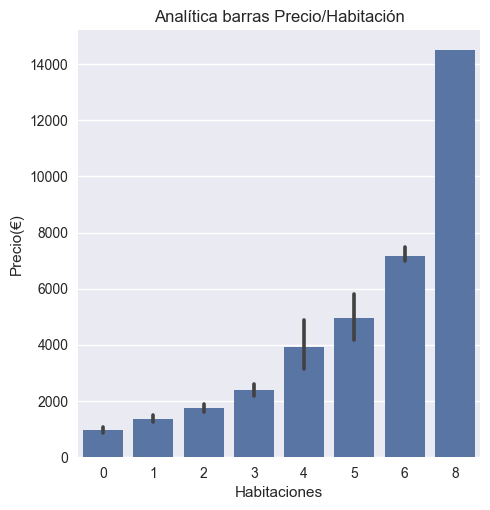

In [255]:
sns.catplot(df_idealista, y='Price', x='Room', kind="bar")
plt.title("Analítica barras Precio/Habitación");
plt.xlabel("Habitaciones");
plt.ylabel("Precio(€)");

In [256]:
df_idealista.describe()

,Price,m2,Floor,Room
count,387.000000,361.000000,387.000000,387.000000
mean,2118.571059,114.177285,3.418605,2.198966
std,1631.897405,99.035973,4.159447,1.238083
min,610.000000,26.000000,0.000000,0.000000
25%,1100.000000,63.000000,1.000000,1.000000
50%,1545.000000,85.000000,2.000000,2.000000
75%,2700.000000,125.000000,4.000000,3.000000
max,14500.000000,1024.000000,40.000000,8.000000


In [257]:
df_idealista.dtypes

Direction       object
Price          float64
m2             float64
Floor            int64
Room             int64
Description     object
dtype: object

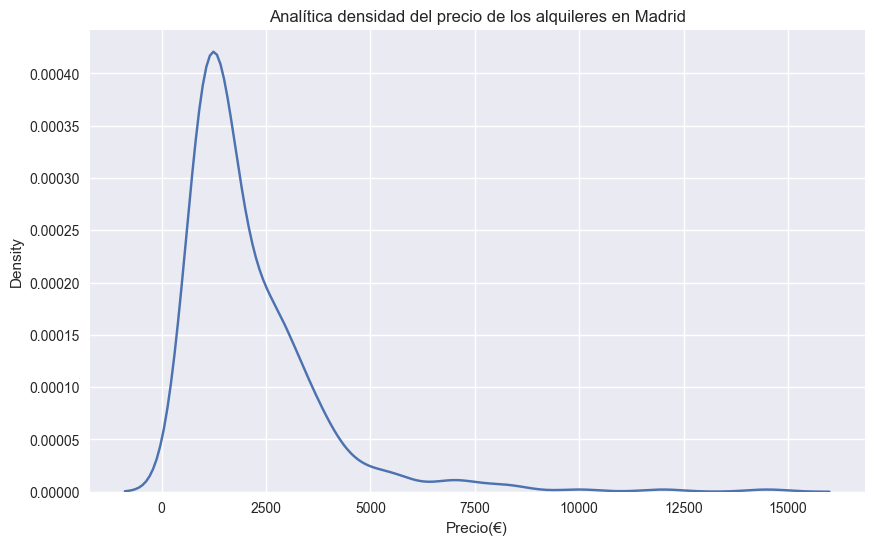

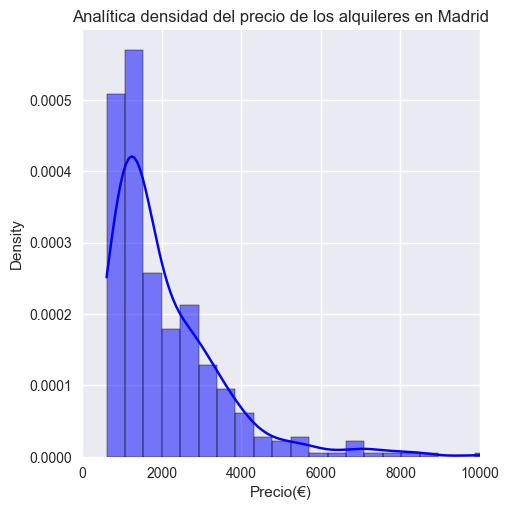

In [258]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_idealista["Price"]);
plt.title("Analítica densidad del precio de los alquileres en Madrid");
plt.xlabel("Precio(€)");
sns.displot(df_idealista["Price"],
             kde=True,
             stat="density",
             color='b',
             bins=30);
plt.xlim(-10,10000)
plt.title("Analítica densidad del precio de los alquileres en Madrid");
plt.xlabel("Precio(€)");

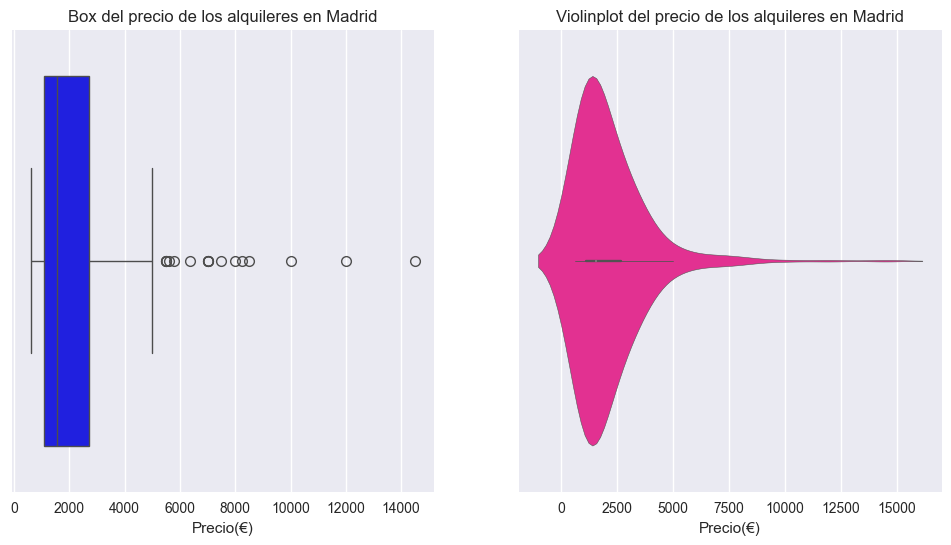

In [259]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=df_idealista["Price"], color="b");
plt.title("Box del precio de los alquileres en Madrid");
plt.xlabel("Precio(€)");
plt.subplot(1,2,2)
sns.violinplot(x=df_idealista["Price"], color='deeppink',bw_method=.5);
plt.title("Violinplot del precio de los alquileres en Madrid");
plt.xlabel("Precio(€)");


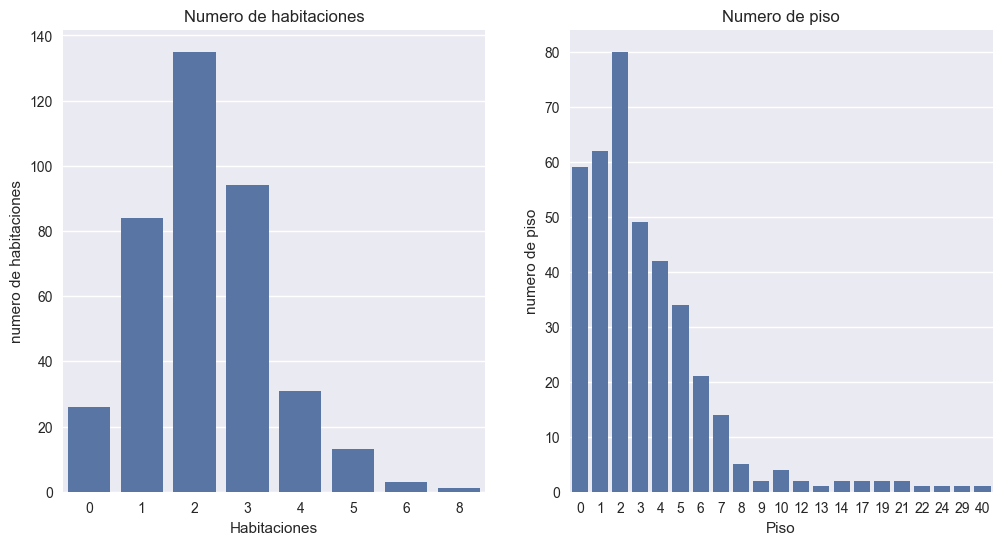

In [260]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=df_idealista["Room"]);
plt.title("Numero de habitaciones")
plt.xlabel("Habitaciones");
plt.ylabel("numero de habitaciones");

plt.subplot(1,2,2)
sns.countplot(x=df_idealista["Floor"]);
plt.title("Numero de piso")
plt.xlabel("Piso");
plt.ylabel("numero de piso");



In [261]:
df_idealista['Room'].value_counts().sort_values(ascending=False)

Room
2    135
3     94
1     84
4     31
0     26
5     13
6      3
8      1
Name: count, dtype: int64

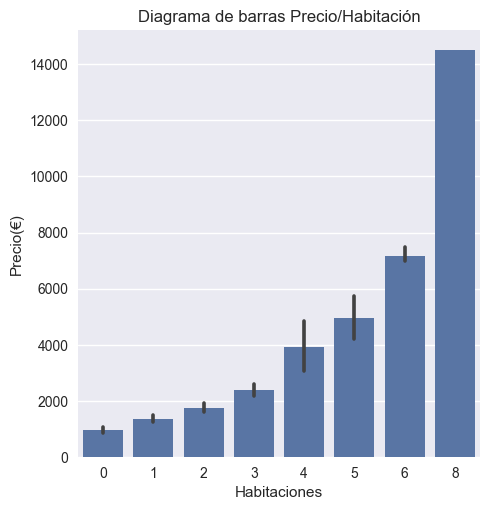

In [262]:
sns.catplot(df_idealista, y='Price', x='Room', kind="bar")
plt.title("Diagrama de barras Precio/Habitación");
plt.xlabel("Habitaciones");
plt.ylabel("Precio(€)");

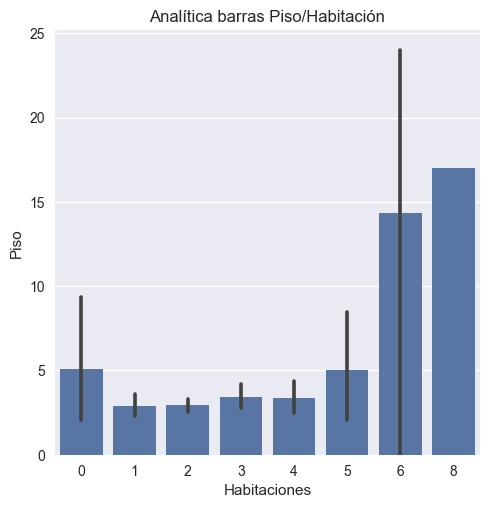

In [263]:
sns.catplot(df_idealista, y='Floor', x='Room', kind="bar")
plt.title("Analítica barras Piso/Habitación");
plt.xlabel("Habitaciones");
plt.ylabel("Piso");

In [264]:
df_m2 = df_idealista["m2"].describe(percentiles=[0,.15,.25,.5,.75,.85])

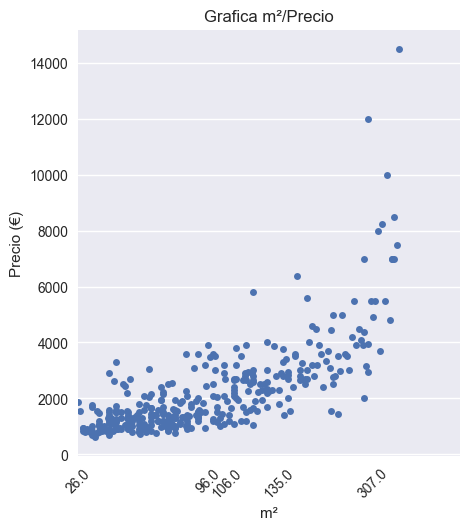

In [265]:
sns.catplot(df_idealista, x='m2', y='Price', kind="strip");
plt.xlim([0, df_m2["75%"]])
plt.xticks(rotation=45,ticks=[0,df_m2["15%"],df_m2["25%"], df_m2["50%"],df_m2["75%"], df_m2["85%"]]);
plt.title("Grafica m\u00B2/Precio");
plt.ylabel("Precio (€)");
plt.xlabel("m²");

In [266]:
df_idealista.columns

Index(['Direction', 'Price', 'm2', 'Floor', 'Room', 'Description'], dtype='object')

/var/folders/28/8cl0hx0s7wn3jhrkn9jsr1780000gp/T/ipykernel_84697/101829125.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/28/8cl0hx0s7wn3jhrkn9jsr1780000gp/T/ipykernel_84697/101829125.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




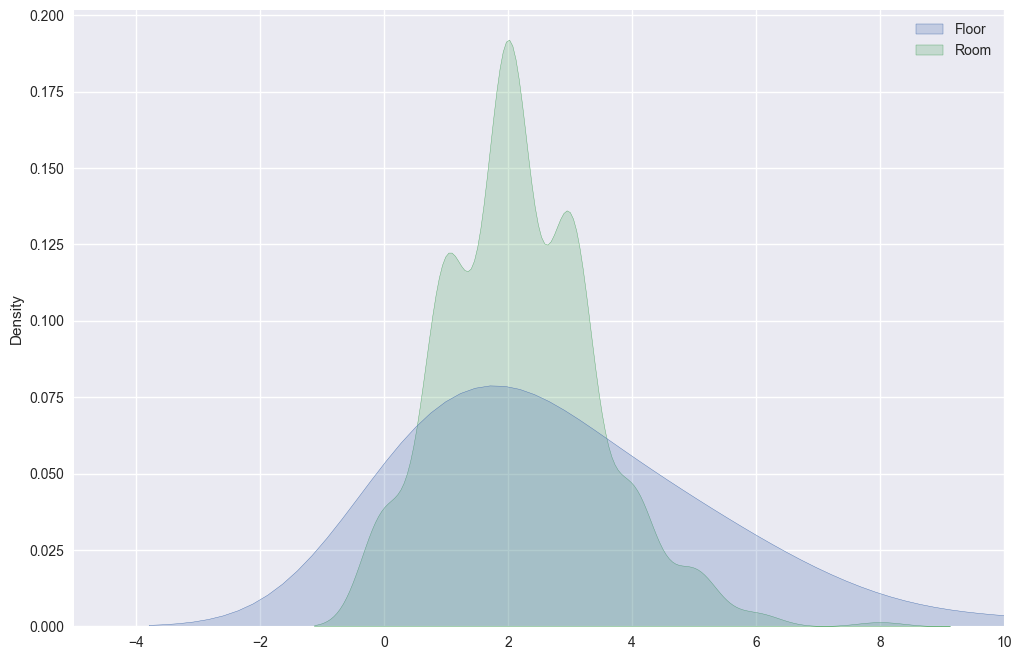

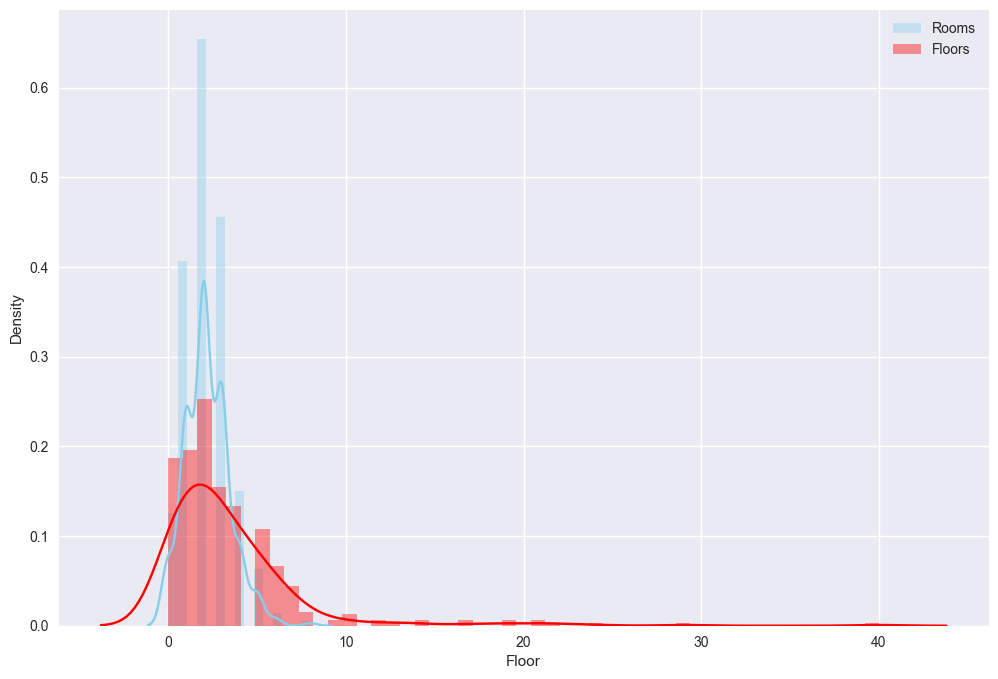

In [267]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_idealista[df_idealista.columns.values[3:5]], fill=True);
plt.xlim(-5,10)
plt.figure(figsize=(12,8))
sns.distplot(df_idealista["Room"] , color="skyblue",kde=True, label="Rooms")
sns.distplot(df_idealista["Floor"] , color="red", kde=True, label="Floors")
#sns.histplot(df_idealista["Room"] , color="skyblue",kde=True, label="Rooms")
#sns.histplot(df_idealista["Floor"] , color="red", kde=True, label="Floors")
plt.legend();

In [268]:
df_idealista[df_idealista["Price"] > 9000]

,Direction,Price,m2,Floor,Room,Description
67,Casa o chalet independiente en ronda Manuel G...,14500.0,1024.0,17,8,Chalet independiente con magnificas vistas ...
111,"Piso en Niño Jesús, Madrid",12000.0,270.0,4,4,ESTATE ONE ofrece fantástico piso reformado c...
264,"Piso en calle de Claudio Coello, Castellana, ...",10000.0,400.0,7,4,Se alquila sin muebles! Ya esta disponible pa...


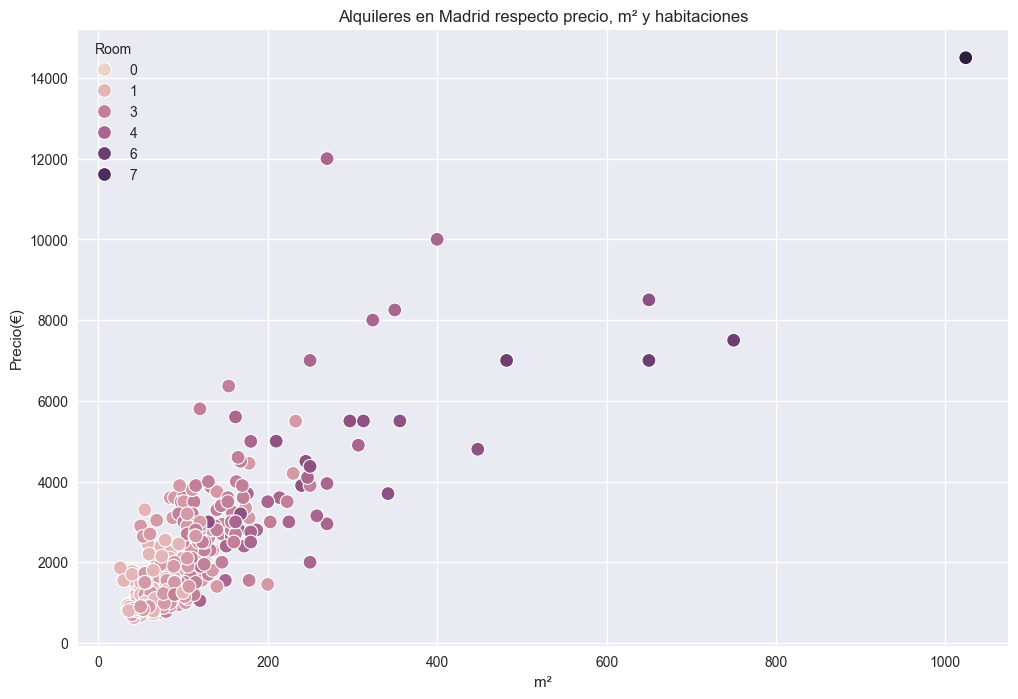

In [269]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_idealista['m2'],
                y=df_idealista['Price'],
                hue = df_idealista['Room'],
               s=100);
plt.title("Alquileres en Madrid respecto precio, m\u00B2 y habitaciones");
plt.xlabel("m\u00B2");
plt.ylabel("Precio(€)");

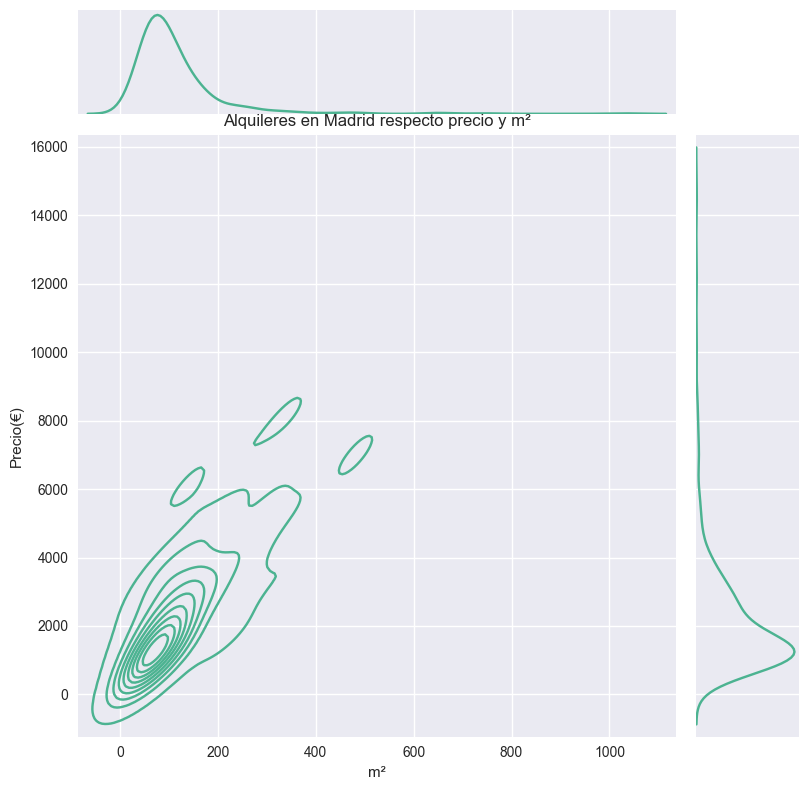

In [270]:
sns.jointplot(x=df_idealista['m2'],
            y=df_idealista['Price'],
            color="#4CB391",
            kind="kde",
            height = 8);

plt.title("Alquileres en Madrid respecto precio y m\u00B2");
plt.xlabel("m\u00B2");
plt.ylabel("Precio(€)");

In [271]:
df_nums = df_idealista.loc[:,"Price":"Room"]

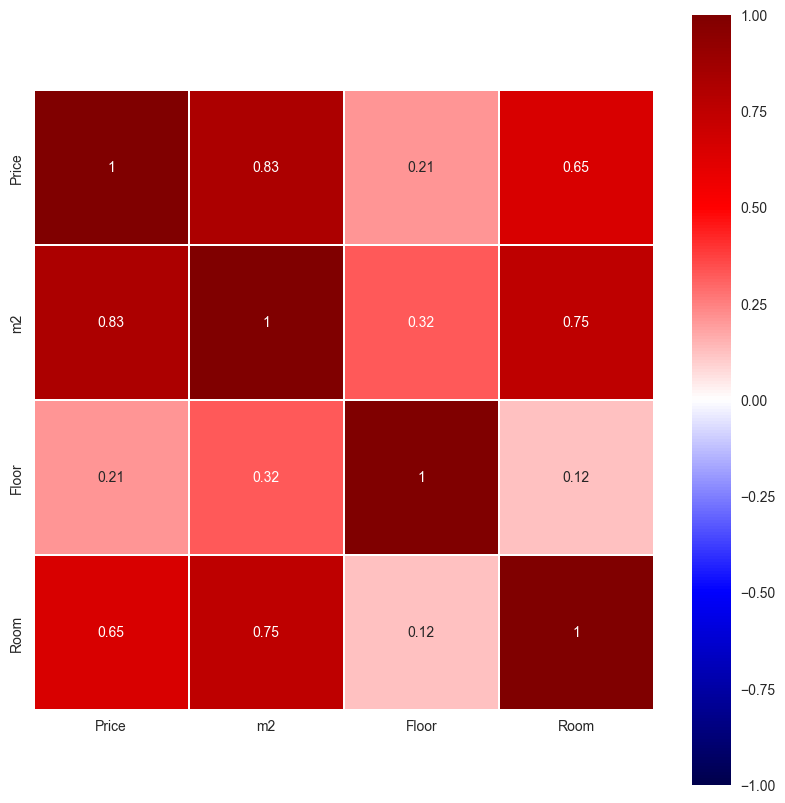

In [272]:
plt.figure(figsize=(10,10))
sns.heatmap(df_nums.corr(),
            vmin=-1,
            vmax=1,
            cmap="seismic",
            square=True,
            linewidths=.1,
            annot=True);

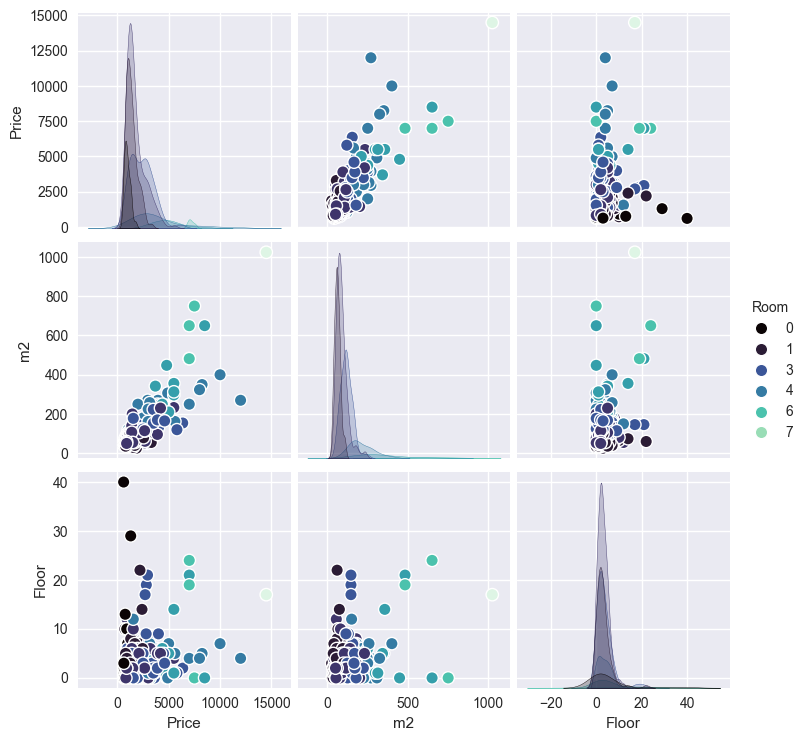

In [273]:
sns.pairplot(df_idealista,
             kind="scatter",
             hue="Room",
             palette="mako",
             plot_kws=dict(s=80, linewidth=1.));



In [274]:
import plotly.express as px


fig = px.scatter_matrix(df_idealista,
    dimensions=["Price", "m2", "Floor"],
    color="Room",
    title="Matriz de puntos de precio,m2 y piso de los alquileres en Madrid",
)
fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


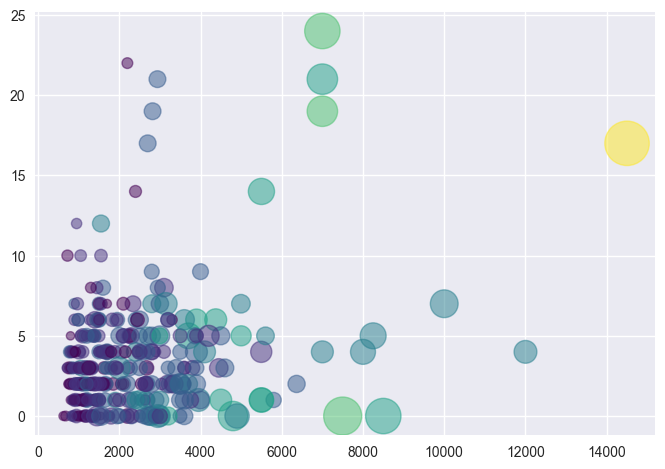

In [275]:
plt.scatter(data=df_idealista, x="Price", y="Floor", label=None,
            c="Room", cmap='viridis',
            s="m2", linewidth=1, alpha=0.5)
df_idealista['Room'].unique()[0]
plt.legend()

In [276]:
# data preparation
df_m2.loc["0%":"max"].values
m2 = [int(m/10) for m in df_idealista[df_idealista["m2"].notna()]["m2"]]

data = [
    {
        'x': df_idealista['Price'],
        'y': df_idealista['Floor'],
        'mode': 'markers',
        'marker': {
            'color': df_idealista['Room'],
            'size': m2,
            'showscale': True
        },
        'text': df_idealista['Direction']
    }
]

iplot(data)

In [277]:
# data preparation

floor = [int(m) for m in df_idealista[df_idealista["Floor"].notna()]["Floor"]]

data = [
    {
        'x': df_idealista['m2'],
        'y': df_idealista['Price'],
        'mode': 'markers',
        'marker': {
            'color': df_idealista['Room'],
            'size': floor,
            'showscale': True
        },
        'text': df_idealista['Direction'],
    }
]

layout = go.Layout(
    title="Análisis de los alquileres por precio, m2, habitaciones y piso",
        xaxis=dict(
        title="m2"
    ),
    yaxis=dict(
        title="Price (€)"
    ) 
)


iplot({'data':data, 'layout': layout})

In [278]:
df_idealista

,Direction,Price,m2,Floor,Room,Description
0,"Piso en avenida del Manzanares, Comillas, Mad...",1500.0,90.0,7,3,InmoRenta; Gestión y Garantía Real de tu alqu...
1,"Piso en calle de Narváez, 9, Goya, Madrid",6365.0,154.0,2,3,Piso de Home Club disponible para alquilarse ...
2,"Piso en Alonso Cano, 65, Nuevos Ministerios-R...",680.0,50.0,0,1,"Piso Interior, situado en la zona de Ríos Ros..."
3,"Piso en paseo del General Martínez Campos, Al...",2200.0,110.0,0,1,"MIA REAL ESTATE, presenta loft para aquellos ..."
4,"Piso en avenida de Monforte de Lemos, 147, Pi...",950.0,55.0,12,2,Bonito piso de 2 habitaciones en finca con po...
...,...,...,...,...,...,...
382,"Piso en Castellana, Madrid",4200.0,230.0,5,2,La Inmobiliaria Internacional CPM gestiona es...
383,"Piso en German Pérez Carrasco, Quintana, Madrid",900.0,50.0,2,2,"¿Estás buscando una vivienda luminosa, recién..."
384,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...
385,"Estudio en calle del Manco de Lepanto, Numanc...",630.0,NaN,3,0,POR FAVOR LEER TODA LA DESCRIPCIÓN DEL ANUNCI...


In [279]:
df_dir_mad = df_idealista.copy()
df_dir_mad["N_direction"] = df_dir_mad["Direction"].str.extract(r'(\d+)')
df_dir_mad = df_dir_mad[df_dir_mad["N_direction"].notna()]
direction_place =  df_dir_mad["Direction"].str.split(",")
for x in direction_place:
    for i,n_x in enumerate(x):
        if i == 2:
            x.pop(i)

dic = {'Street': [], 'N_direction': [], 'City': []}
for l in direction_place:
    dic['Street'].append(l[0].strip())
    dic['N_direction'].append(l[1].strip())
    dic['City'].append(l[2].strip())
dic
df_dir_mad["Street"] = dic["Street"]
df_dir_mad["N_direction"] = dic["N_direction"]
df_dir_mad["City"] = dic["City"]

df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Piso en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Ático en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Dúplex en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Estudio en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("de ", "")

df_dir_mad

,Direction,Price,m2,Floor,Room,Description,N_direction,Street,City
1,"Piso en calle de Narváez, 9, Goya, Madrid",6365.0,154.0,2,3,Piso de Home Club disponible para alquilarse ...,9,calle Narváez,Madrid
2,"Piso en Alonso Cano, 65, Nuevos Ministerios-R...",680.0,50.0,0,1,"Piso Interior, situado en la zona de Ríos Ros...",65,Alonso Cano,Madrid
4,"Piso en avenida de Monforte de Lemos, 147, Pi...",950.0,55.0,12,2,Bonito piso de 2 habitaciones en finca con po...,147,avenida Monforte Lemos,Madrid
6,"Piso en calle del Monasterio de Caaveiro, 8, ...",750.0,72.0,3,1,Pequeña terraza/tendedero.,8,calle del Monasterio Caaveiro,Madrid
10,"Ático en calle de Fermín Caballero, 91, Peñag...",1600.0,118.0,8,3,Ático exterior de 3 habitaciones con magnífic...,91,calle Fermín Caballero,Madrid
...,...,...,...,...,...,...,...,...,...
379,"Piso en calle Raza, 4, Canillejas, Madrid",900.0,60.0,2,2,GRUPO INTERPRES alquila en exclusiva este pis...,4,calle Raza,Madrid
380,"Piso en calle de Núñez de Balboa, 12, Recolet...",4500.0,168.0,5,3,Viba Real Estate ofrece esta magnífica vivien...,12,calle Núñez Balboa,Madrid
381,"Piso en calle de Voluntarios Macabebes, 3, Ch...",825.0,53.0,0,2,Se alquila vivienda de 53m2 (48m útiles según...,3,calle Voluntarios Macabebes,Madrid
384,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...,18,calle Hermosilla,Madrid


In [280]:
place = df_dir_mad.loc[4,"City"] + ", " + df_dir_mad.loc[4,"Street"] + ", " + df_dir_mad.loc[4,"N_direction"]
address = geocoder.osm(place)
address
place


'Madrid, avenida Monforte Lemos, 147'

In [281]:
address

<[OK] Osm - Geocode [147, Avenida de Monforte de Lemos, Ciudad de los Periodistas, El Pilar, Fuencarral-El Pardo, Madrid, Comunidad de Madrid, 28029, España]>

In [282]:
df_dir_mad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1 to 386
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direction    135 non-null    object 
 1   Price        135 non-null    float64
 2   m2           124 non-null    float64
 3   Floor        135 non-null    int64  
 4   Room         135 non-null    int64  
 5   Description  131 non-null    object 
 6   N_direction  135 non-null    object 
 7   Street       135 non-null    object 
 8   City         135 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.6+ KB


In [283]:

# map
map_mad = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=12,
                #  width=700,
                #  height=500,
                 control_scale=True)
# plot rents madrid locations
for (index, row) in df_dir_mad.iterrows():
    try:
        place = row.loc["City"] + ", " + row.loc["Street"] + ", " + row.loc["N_direction"]
        address = geocoder.osm(place)
        addr_lat = address.lat
        addr_lng = address.lng
        # add marker to map
        folium.Marker(location = [addr_lat, addr_lng],
                    popup = place + ' ' + str(row['Price']) + '€, ' + str(row['m2']) + "m\u00B2",
                    tooltip = 'click',
                    icon=folium.Icon(icon="glyphicon-home", prefix='glyphicon')).add_to(map_mad)
    except:
        print(place)

# display map
display(map_mad)

Madrid, calle del Heliótropo, 2
Madrid, avenida del Ensanche Vallecas, 114
Madrid, calle Castillla, 38
Madrid, calle Gran Via Hortaleza, 5
Madrid, calle del AlcalSáinz Baranda, 4
Madrid, calle los Fundadores, 23
Madrid, avenida Cerro Valdecahonde, 18
Madrid, calle del Balcón Corralejos, 8
Madrid, avenida la Gran Vía del Sureste, 33
Madrid, avenida cerro valdecahonde, 26


In [287]:
# add geojson file to map
folium.GeoJson('../../data/LímitesdelosBarriosAdministrativosdeMadrid.geojson',
                name='geojson Madrid Barrios',).add_to(map_mad)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_mad)

# display map
map_mad

In [284]:

df_dir_mad["lat"] = df_dir_mad.apply(lambda row: geocoder.osm(f"{row['City']}, {row['Street']}, {row['N_direction']}").lat, axis=1)
df_dir_mad["lng"] = df_dir_mad.apply(lambda row: geocoder.osm(f"{row['City']}, {row['Street']}, {row['N_direction']}").lng, axis=1)

In [288]:
df_dir_mad.dropna(axis=0,inplace=True)
df_dir_mad

,Direction,Price,m2,Floor,Room,Description,N_direction,Street,City,lat,lng
1,"Piso en calle de Narváez, 9, Goya, Madrid",6365.0,154.0,2,3,Piso de Home Club disponible para alquilarse ...,9,calle Narváez,Madrid,40.424461,-3.675749
2,"Piso en Alonso Cano, 65, Nuevos Ministerios-R...",680.0,50.0,0,1,"Piso Interior, situado en la zona de Ríos Ros...",65,Alonso Cano,Madrid,40.442863,-3.697423
4,"Piso en avenida de Monforte de Lemos, 147, Pi...",950.0,55.0,12,2,Bonito piso de 2 habitaciones en finca con po...,147,avenida Monforte Lemos,Madrid,40.477268,-3.713350
6,"Piso en calle del Monasterio de Caaveiro, 8, ...",750.0,72.0,3,1,Pequeña terraza/tendedero.,8,calle del Monasterio Caaveiro,Madrid,40.504758,-3.696461
10,"Ático en calle de Fermín Caballero, 91, Peñag...",1600.0,118.0,8,3,Ático exterior de 3 habitaciones con magnífic...,91,calle Fermín Caballero,Madrid,40.478063,-3.720799
...,...,...,...,...,...,...,...,...,...,...,...
379,"Piso en calle Raza, 4, Canillejas, Madrid",900.0,60.0,2,2,GRUPO INTERPRES alquila en exclusiva este pis...,4,calle Raza,Madrid,40.447419,-3.612003
380,"Piso en calle de Núñez de Balboa, 12, Recolet...",4500.0,168.0,5,3,Viba Real Estate ofrece esta magnífica vivien...,12,calle Núñez Balboa,Madrid,40.422908,-3.682822
381,"Piso en calle de Voluntarios Macabebes, 3, Ch...",825.0,53.0,0,2,Se alquila vivienda de 53m2 (48m útiles según...,3,calle Voluntarios Macabebes,Madrid,40.393007,-3.695478
384,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...,18,calle Hermosilla,Madrid,40.426357,-3.686140


In [286]:
df_dir_mad.to_csv("../../data/rentaMadridDatosLimpios.csv", sep=";")